# Une série temporelle est une série dont l'indice est un temps.

In [253]:
pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [254]:

import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Dans ce notebook, nous allons introduire l'analyse des séries temporelles. Une série temporelle est une série dont l'index est le temps. Un exemple de série temporelle est par exemple, la température d'un pays sur une année, le prix du bitcoin ces 6 derniers mois. Ces valeurs diminuent ou augmentent en fonction du temps. Les analyser nous permet donc d'identifier les tendances, la saisonabilité et plus encore.

Pour ce projet, nous allons utiliser des données de consommation d'énergie electrique et également de production en énergie solaire et éolienne en Allemagne de 2006 à 2017

In [255]:
energy = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
print(energy.head())

         Date  Consumption  Wind  Solar  Wind+Solar
0  2006-01-01     1069.184   NaN    NaN         NaN
1  2006-01-02     1380.521   NaN    NaN         NaN
2  2006-01-03     1442.533   NaN    NaN         NaN
3  2006-01-04     1457.217   NaN    NaN         NaN
4  2006-01-05     1477.131   NaN    NaN         NaN


In [256]:
energy

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [257]:
energy.shape

(4383, 5)

In [258]:
energy.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
3103,2014-07-01,1407.234,61.670,176.137,237.807
3040,2014-04-29,1468.143,15.868,113.807,129.675
1335,2009-08-28,1262.891,NaN,NaN,NaN
1871,2011-02-15,1505.231,166.367,NaN,NaN
3143,2014-08-10,1053.571,180.141,130.861,311.002


In [259]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


In [260]:
energy['Date']

0       2006-01-01
1       2006-01-02
2       2006-01-03
3       2006-01-04
4       2006-01-05
           ...    
4378    2017-12-27
4379    2017-12-28
4380    2017-12-29
4381    2017-12-30
4382    2017-12-31
Name: Date, Length: 4383, dtype: object

In [261]:
energy['Date'].isnull().any() # on vérifie si il y a des valeurs manquantes

np.False_

In [262]:
energy['Date'] = pd.to_datetime(energy['Date']) # pour convertir la colonne Date en datetime
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [263]:
energy = energy.set_index('Date')
energy.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


In [264]:
#si on fait #energy.isnull().mean() alors on trouve la proportion des valeurs manquantes

In [265]:
energy.isnull().mean()

Consumption    0.000000
Wind           0.333790
Solar          0.500799
Wind+Solar     0.501027
dtype: float64

# En série temporelle pour nettoyer les données manquantes on utilse le ffill()
exemple energy = energy.ffill()

In [266]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [267]:
energy.index[:5]

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [268]:
energy.index[:5].month

Index([1, 1, 1, 1, 1], dtype='int32', name='Date')

In [269]:
energy.index[:5].day

Index([1, 2, 3, 4, 5], dtype='int32', name='Date')

In [270]:
energy.index[:5].day_name()

Index(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday'], dtype='object', name='Date')

# Création des collones relative aux analyses

In [271]:
energy['Year'] = energy.index.year
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year
Date,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006
2006-01-02,1380.521,NaN,NaN,NaN,2006
2006-01-03,1442.533,NaN,NaN,NaN,2006
2006-01-04,1457.217,NaN,NaN,NaN,2006
2006-01-05,1477.131,NaN,NaN,NaN,2006


## Pour voir combien de lignes nous avons par an on fait:


In [272]:
energy.Year.value_counts()

Year
2008    366
2012    366
2016    366
2006    365
2009    365
2007    365
2011    365
2010    365
2013    365
2014    365
2015    365
2017    365
Name: count, dtype: int64

## création du mois et du jour également

In [273]:
energy['Month'] = energy.index.month
energy['day_name'] = energy.index.day_name()
energy.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday


## Demandons à pandas de nous dire si un jour est week-end ou non.

In [274]:
energy['is_weekend'] = energy.day_name.isin(["Sunday", "Saturday"])

In [306]:
energy

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,False
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,False
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,False
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,False
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,False
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,False
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,False


In [275]:
(energy.day_name == 'Saturday') | (energy.day_name == 'Sunday')

Date
2006-01-01     True
2006-01-02    False
2006-01-03    False
2006-01-04    False
2006-01-05    False
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30     True
2017-12-31     True
Name: day_name, Length: 4383, dtype: bool

In [276]:
x = 2
if x == 5 or x ==9 or x == 12:
  pass

if x in [5, 9, 12]:
  pass

In [277]:
(energy.day_name == 'Saturday') &   (energy.day_name == 'Sunday')

Date
2006-01-01    False
2006-01-02    False
2006-01-03    False
2006-01-04    False
2006-01-05    False
              ...  
2017-12-27    False
2017-12-28    False
2017-12-29    False
2017-12-30    False
2017-12-31    False
Name: day_name, Length: 4383, dtype: bool

In [278]:
energy

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,True
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,False
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,False
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,False
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,False
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,False
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,False
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,False


In [279]:
energy.is_weekend.value_counts()

is_weekend
False    3130
True     1253
Name: count, dtype: int64

In [280]:
energy.Year.max()

np.int32(2017)

## si on veut sélectionner uniquement les données du mois de Mais on fait :

In [309]:
energy.loc["2010-05-01":"2010-05-31"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2010-05-01,1003.133,71.799,NaN,NaN,2010,5,Saturday,True
2010-05-02,1025.534,38.272,NaN,NaN,2010,5,Sunday,True
2010-05-03,1357.760,42.253,NaN,NaN,2010,5,Monday,False
2010-05-04,1380.307,97.348,NaN,NaN,2010,5,Tuesday,False
2010-05-05,1377.111,94.939,NaN,NaN,2010,5,Wednesday,False
2010-05-06,1457.839,198.704,NaN,NaN,2010,5,Thursday,False
2010-05-07,1378.971,66.482,NaN,NaN,2010,5,Friday,False
2010-05-08,1143.806,9.702,NaN,NaN,2010,5,Saturday,True
2010-05-09,1038.169,12.997,NaN,NaN,2010,5,Sunday,True


## Si on veut uniquement les données de 2007 on fait :

In [310]:
energy.loc["2007"]

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2007-01-01,1128.843,NaN,NaN,NaN,2007,1,Monday,False
2007-01-02,1416.669,NaN,NaN,NaN,2007,1,Tuesday,False
2007-01-03,1471.586,NaN,NaN,NaN,2007,1,Wednesday,False
2007-01-04,1514.823,NaN,NaN,NaN,2007,1,Thursday,False
2007-01-05,1484.168,NaN,NaN,NaN,2007,1,Friday,False
...,...,...,...,...,...,...,...,...
2007-12-27,1287.245,NaN,NaN,NaN,2007,12,Thursday,False
2007-12-28,1308.594,NaN,NaN,NaN,2007,12,Friday,False
2007-12-29,1256.510,NaN,NaN,NaN,2007,12,Saturday,True


## si je veux connaitre les valeurs des périodes de fête, c'est dire la fin d'année et le début d'année je fais :

In [312]:
energy.loc["2016-11-20":"2016-12-31"].head(5)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-11-20,1233.973,653.836,46.876,700.712,2016,11,Sunday,True
2016-11-21,1533.053,392.469,32.608,425.077,2016,11,Monday,False
2016-11-22,1552.999,242.999,26.529,269.528,2016,11,Tuesday,False
2016-11-23,1546.154,87.572,36.896,124.468,2016,11,Wednesday,False
2016-11-24,1565.587,236.318,29.136,265.454,2016,11,Thursday,False


<Axes: xlabel='Date'>

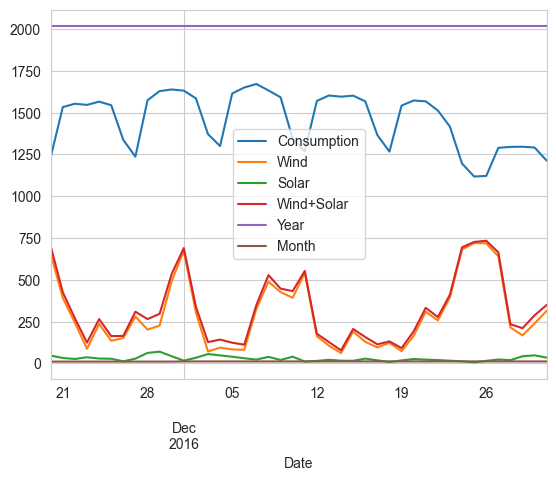

In [313]:
energy.loc["2016-11-20":"2016-12-31"].plot()

In [314]:
energy.loc["2016-12-25"]

Consumption    1117.673
Wind            719.778
Solar             6.608
Wind+Solar      726.386
Year               2016
Month                12
day_name         Sunday
is_weekend         True
Name: 2016-12-25 00:00:00, dtype: object

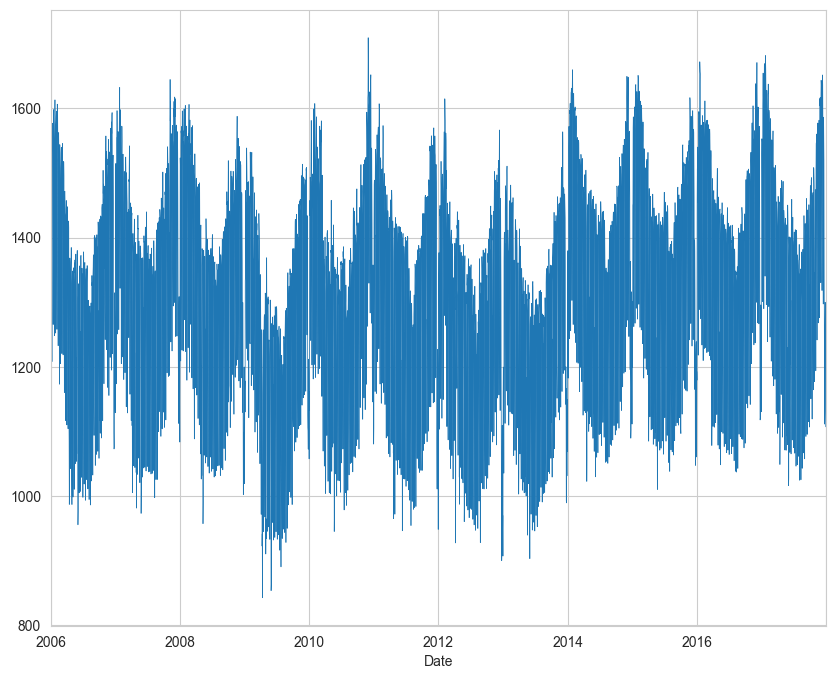

In [281]:
sns.set_style("whitegrid")
energy['Consumption'].plot(linewidth=.5, figsize=(10, 8))
plt.show()

#Quel est le jour avec le plus de consommation en global?

In [282]:
# Jour avec le plus de consommation
energy.groupby('day_name').sum()['Consumption'].sort_values()

day_name
Sunday       691646.51735
Saturday     751544.19949
Monday       870006.24492
Friday       873034.67157
Thursday     889645.06681
Tuesday      894101.79246
Wednesday    897437.69479
Name: Consumption, dtype: float64

In [ ]:
# Jour avec le plus de consommation
energy.groupby('day_name').sum()['Consumption'].sort_values().max()

np.float64(897437.69479)

In [284]:
groupday = energy.groupby('day_name').sum()['Consumption'].reset_index()
groupday

,day_name,Consumption
0,Friday,873034.67157
1,Monday,870006.24492
2,Saturday,751544.19949
3,Sunday,691646.51735
4,Thursday,889645.06681
5,Tuesday,894101.79246
6,Wednesday,897437.69479


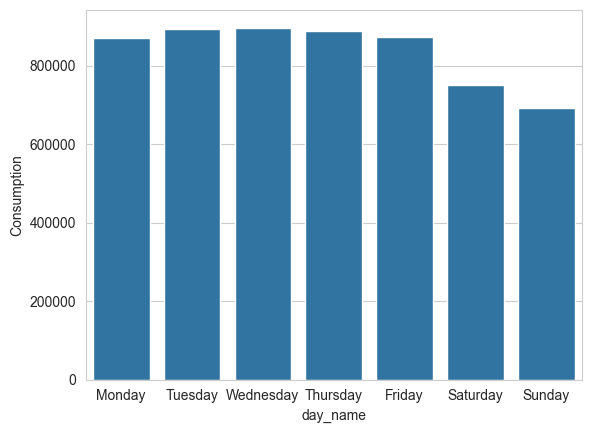

In [285]:
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.barplot(x = groupday['day_name'], y = groupday['Consumption'], order=order)
plt.show()

In [286]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

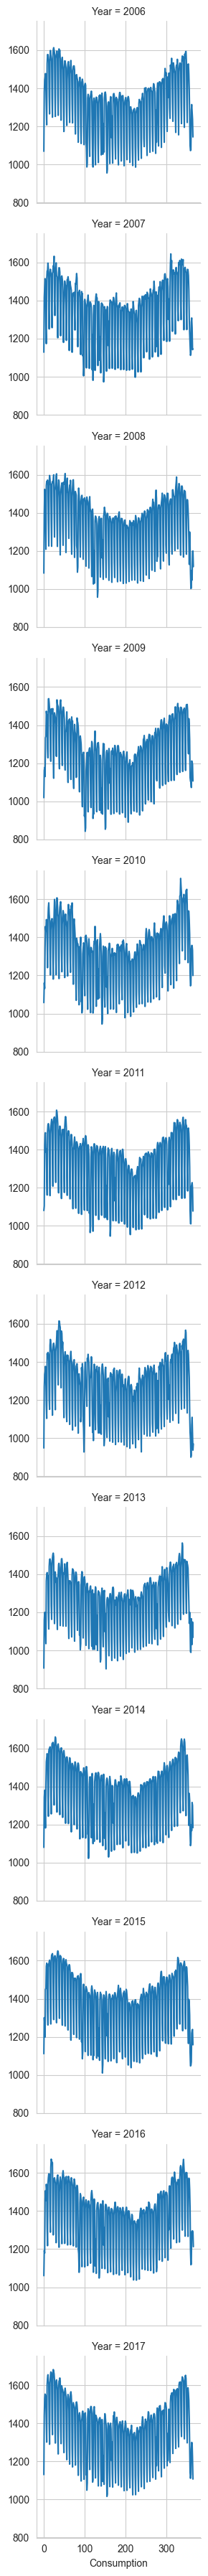

In [287]:
grid = sns.FacetGrid(energy, row="Year")
grid.map(plt.plot,'Consumption')

In [316]:
energy.loc["2009"].max()

Consumption     1538.894
Wind                 NaN
Solar                NaN
Wind+Solar           NaN
Year                2009
Month                 12
day_name       Wednesday
is_weekend          True
dtype: object

In [288]:
data = energy.loc['2016'].copy()
data


,Consumption,Wind,Solar,Wind+Solar,Year,Month,day_name,is_weekend
Date,,,,,,,,
2016-01-01,1060.366,107.209,18.563,125.772,2016,1,Friday,False
2016-01-02,1192.698,409.622,9.406,419.028,2016,1,Saturday,True
2016-01-03,1179.282,406.296,13.519,419.815,2016,1,Sunday,True
2016-01-04,1456.294,278.460,10.080,288.540,2016,1,Monday,False
2016-01-05,1506.737,206.468,12.549,219.017,2016,1,Tuesday,False
...,...,...,...,...,...,...,...,...
2016-12-27,1289.324,640.895,23.448,664.343,2016,12,Tuesday,False
2016-12-28,1294.881,214.990,19.450,234.440,2016,12,Wednesday,False
2016-12-29,1295.897,167.698,42.910,210.608,2016,12,Thursday,False


<Axes: xlabel='Date'>

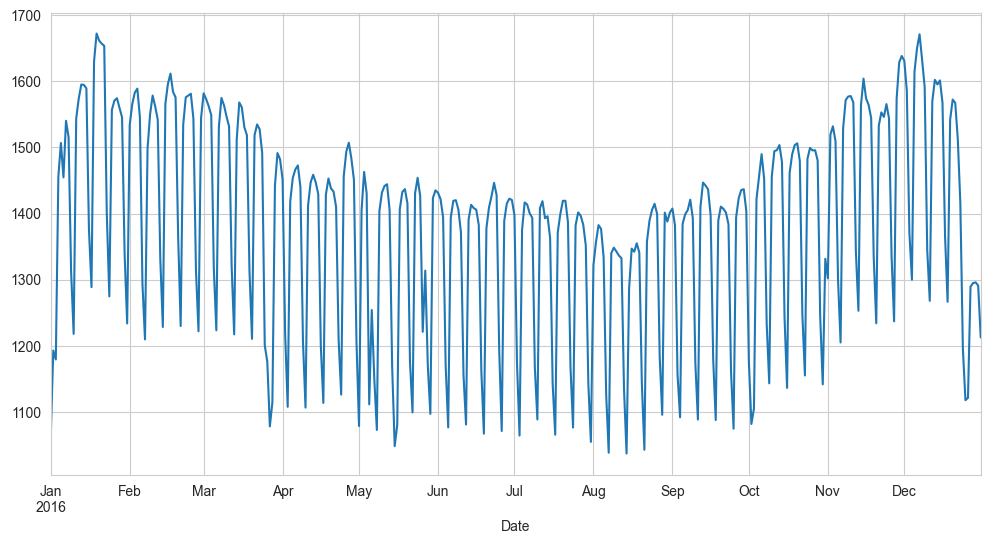

In [289]:
data = energy.loc['2016'].copy()
data.index = pd.to_datetime(data.index)
data['Consumption'].plot(figsize=(12, 6))

In [290]:
energy.index

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [291]:
data.index

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', name='Date', length=366, freq=None)

(np.float64(16801.0), np.float64(17166.0))

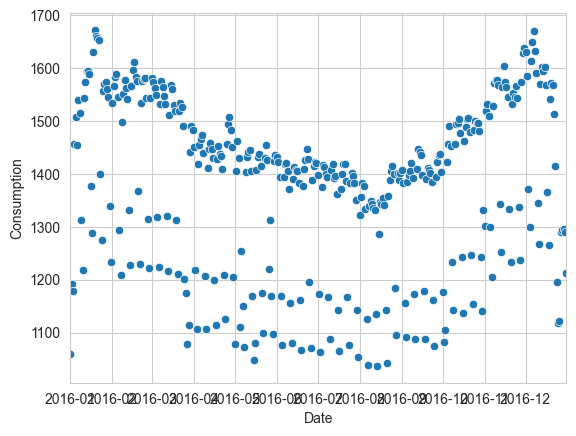

In [292]:
sns.scatterplot( x = data.index, y=data['Consumption'])
plt.xlim(data.index.min(), data.index.max())

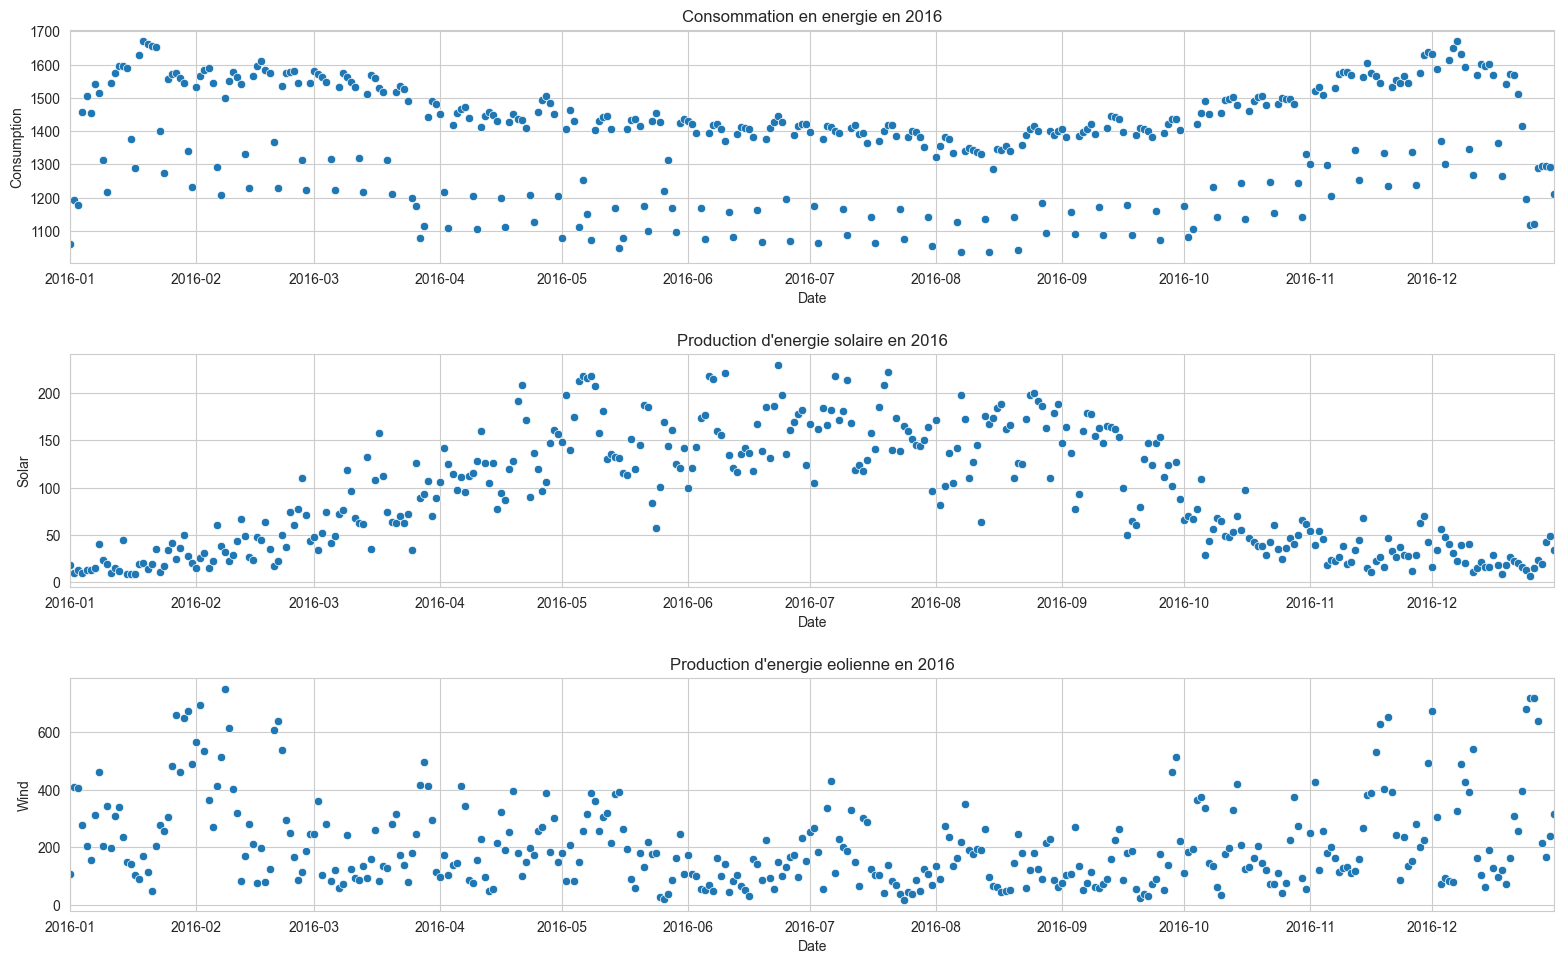

In [293]:
fig, axes = plt.subplots(figsize=(16, 10), nrows=3, ncols=1)

sns.scatterplot(data =data, x = data.index, y='Consumption', ax=axes[0])
axes[0].set_title('Consommation en energie en 2016')
axes[0].set_xlim(data.index.min(), data.index.max())
 
sns.scatterplot(data =data, x = data.index, y='Solar',ax=axes[1])
axes[1].set_title("Production d'energie solaire en 2016")
axes[1].set_xlim(data.index.min(), data.index.max())

sns.scatterplot(data =data, x = data.index, y='Wind',ax=axes[2])
axes[2].set_title("Production d'energie eolienne en 2016")
axes[2].set_xlim(data.index.min(), data.index.max())
fig.tight_layout(pad=2)

<Axes: xlabel='Date', ylabel='Consumption'>

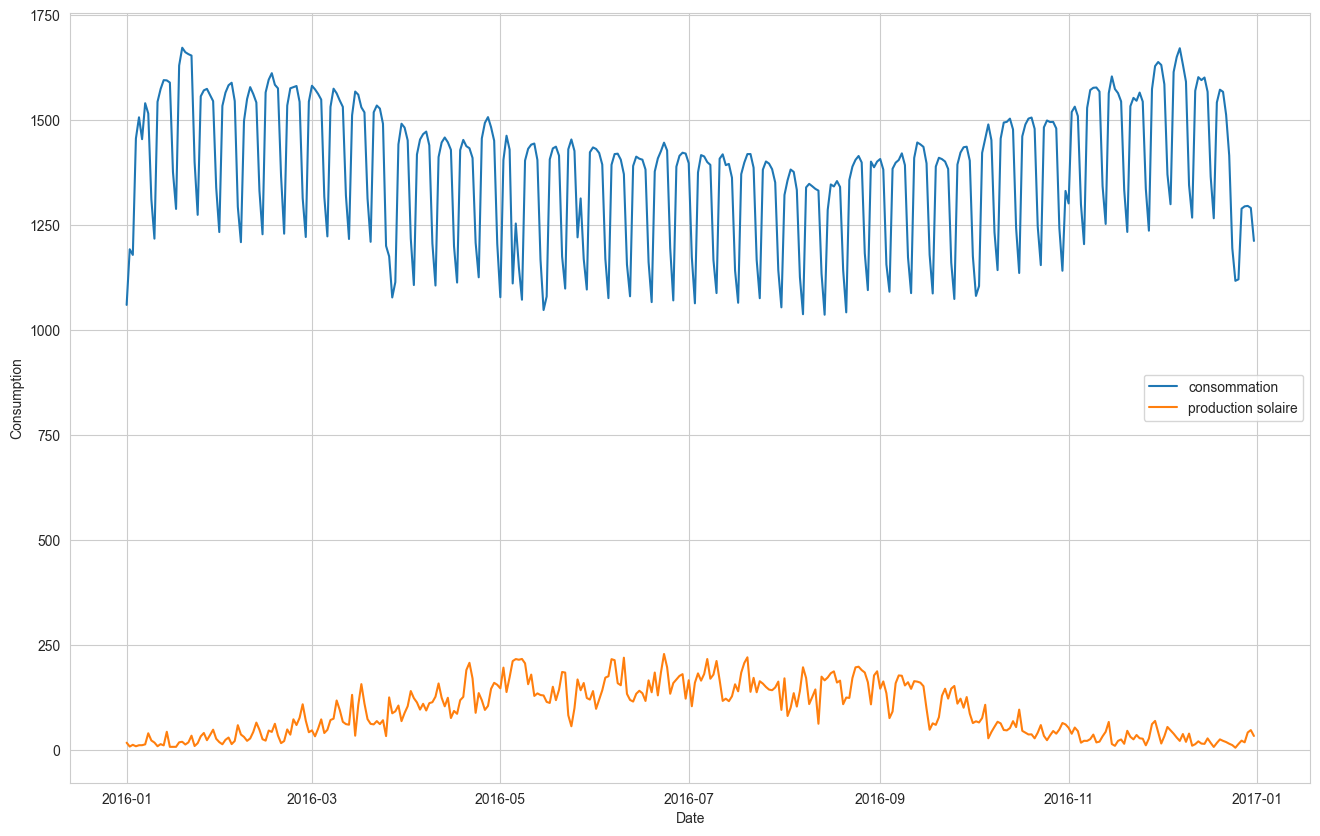

In [294]:
fig, ax = plt.subplots(figsize=(16, 10), nrows=1, ncols=1)
sns.lineplot(data =data, x = data.index, y='Consumption', ax=ax, legend='brief', label='consommation')

 
sns.lineplot(data =data, x = data.index, y='Solar',ax=ax, legend='brief', label='production solaire')


# sns.scatterplot(data =data_2016, x = data.index, y='Wind',ax=axes[2])
# axes[2].set_title("Production d'energie eolienne en 2016")
# fig.tight_layout(pad=2)

In [295]:
energy.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'day_name', 'is_weekend'],
      dtype='object')

Consommation par mois

<Axes: xlabel='Month', ylabel='Consumption'>

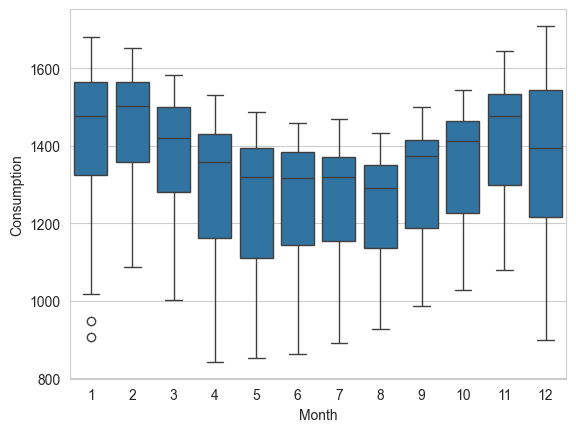

In [296]:
sns.boxplot(data=energy, x="Month", y='Consumption')

In [297]:
energy.columns

Index(['Consumption', 'Wind', 'Solar', 'Wind+Solar', 'Year', 'Month',
       'day_name', 'is_weekend'],
      dtype='object')

In [298]:
energy["day_name"].unique()

array(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       'Saturday'], dtype=object)

C:\Users\augus.AUGUSTINJUGHEAD\AppData\Local\Temp\ipykernel_12588\458185032.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(rotation=30, labels=energy["day_name"].unique())


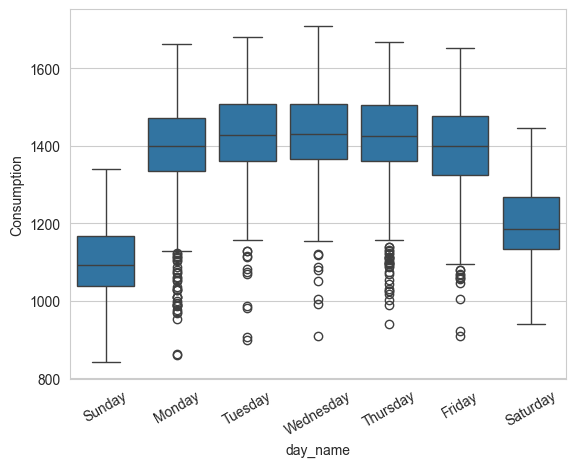

In [299]:
g = sns.boxplot(data=energy, x="day_name", y='Consumption')
g.set_xticklabels(rotation=30, labels=energy["day_name"].unique())
plt.show()

C:\Users\augus.AUGUSTINJUGHEAD\AppData\Local\Temp\ipykernel_12588\3828166646.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(rotation=30, labels=energy["is_weekend"].unique())


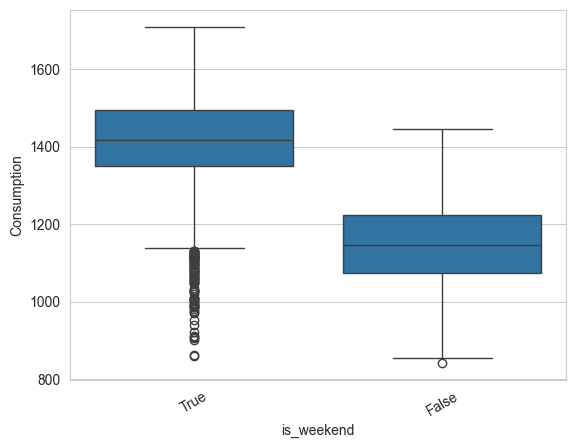

In [300]:
g = sns.boxplot(data=energy, x="is_weekend", y='Consumption')
g.set_xticklabels(rotation=30, labels=energy["is_weekend"].unique())
plt.show()

Consommation par semaine

In [301]:
energy_numeric = energy.select_dtypes(include='number')
weekly_mean = energy_numeric.resample('W').mean()
weekly_mean

,Consumption,Wind,Solar,Wind+Solar,Year,Month
Date,,,,,,
2006-01-01,1069.184000,NaN,NaN,NaN,2006.0,1.000000
2006-01-08,1381.300143,NaN,NaN,NaN,2006.0,1.000000
2006-01-15,1486.730286,NaN,NaN,NaN,2006.0,1.000000
2006-01-22,1490.031143,NaN,NaN,NaN,2006.0,1.000000
2006-01-29,1514.176857,NaN,NaN,NaN,2006.0,1.000000
...,...,...,...,...,...,...
2017-12-03,1536.236314,284.334286,18.320857,302.655143,2017.0,11.428571
2017-12-10,1554.824946,636.514714,16.440286,652.955000,2017.0,12.000000
2017-12-17,1543.856889,442.531857,18.143714,460.675571,2017.0,12.000000


Consommation en moyenne par mois

In [302]:
conso_par_mois = energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('M').sum()
conso_par_mois

C:\Users\augus.AUGUSTINJUGHEAD\AppData\Local\Temp\ipykernel_12588\3053471907.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  conso_par_mois = energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('M').sum()


,Consumption,Wind,Solar,Wind+Solar,day_name
Date,,,,,
2006-01-31,45304.70400,0.000,0.000,0.000,SundayMondayTuesdayWednesdayThursdayFridaySatu...
2006-02-28,41078.99300,0.000,0.000,0.000,WednesdayThursdayFridaySaturdaySundayMondayTue...
2006-03-31,43978.12400,0.000,0.000,0.000,WednesdayThursdayFridaySaturdaySundayMondayTue...
2006-04-30,38251.76700,0.000,0.000,0.000,SaturdaySundayMondayTuesdayWednesdayThursdayFr...
2006-05-31,38858.14300,0.000,0.000,0.000,MondayTuesdayWednesdayThursdayFridaySaturdaySu...
...,...,...,...,...,...
2017-08-31,40029.77368,5499.798,4602.808,10102.606,TuesdayWednesdayThursdayFridaySaturdaySundayMo...
2017-09-30,40078.56092,6287.730,3079.291,9367.021,FridaySaturdaySundayMondayTuesdayWednesdayThur...
2017-10-31,42355.21893,12480.097,2130.557,14610.654,SundayMondayTuesdayWednesdayThursdayFridaySatu...


Consommation par trimestre

In [303]:
 energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('Q').sum()

C:\Users\augus.AUGUSTINJUGHEAD\AppData\Local\Temp\ipykernel_12588\3805894266.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  energy.drop(['Year',"Month", "is_weekend"], axis=1).resample('Q').sum()


,Consumption,Wind,Solar,Wind+Solar,day_name
Date,,,,,
2006-03-31,130361.82100,0.000,0.000,0.000,SundayMondayTuesdayWednesdayThursdayFridaySatu...
2006-06-30,114363.36000,0.000,0.000,0.000,SaturdaySundayMondayTuesdayWednesdayThursdayFr...
2006-09-30,116664.13500,0.000,0.000,0.000,SaturdaySundayMondayTuesdayWednesdayThursdayFr...
2006-12-31,127679.22000,0.000,0.000,0.000,SundayMondayTuesdayWednesdayThursdayFridaySatu...
2007-03-31,129072.56700,0.000,0.000,0.000,MondayTuesdayWednesdayThursdayFridaySaturdaySu...
2007-06-30,116357.37300,0.000,0.000,0.000,SundayMondayTuesdayWednesdayThursdayFridaySatu...
2007-09-30,119972.07200,0.000,0.000,0.000,SundayMondayTuesdayWednesdayThursdayFridaySatu...
2007-12-31,131229.83500,0.000,0.000,0.000,MondayTuesdayWednesdayThursdayFridaySaturdaySu...
2008-03-31,131525.92900,0.000,0.000,0.000,TuesdayWednesdayThursdayFridaySaturdaySundayMo...
